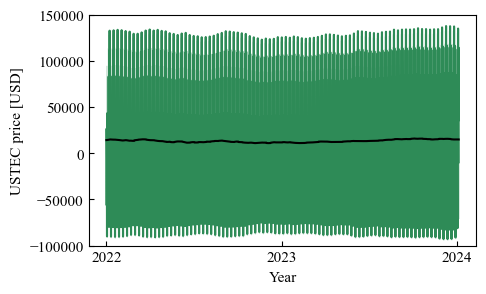

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import torch

pred_proposed = np.load('result\\2024-01-26-04-15_事前教師ありとGAN\\valid\\pred_40.npy') * 20000
target_proposed = np.load('result\\2024-01-26-04-15_事前教師ありとGAN\\valid\\target_40.npy') * 20000
# 可視化（SMA、EMA、ボリンジャーバンド）
plt.rcParams["font.size"] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.figure(figsize=(5,3))
plt.plot(pred_proposed[:, 0], label='pred', color='seagreen')
plt.fill_between(np.arange(len(pred_proposed[:, 0])), pred_proposed[:, 1], pred_proposed[:, 2], color='seagreen', alpha=0.2)
plt.plot(target_proposed[:, 0], label='target', color='black')
plt.fill_between(np.arange(len(target_proposed[:, 0])), target_proposed[:, 1], target_proposed[:, 2], color='black', alpha=0.2)
plt.xlabel("Year")
plt.ylabel("USTEC price [USD]")
# x軸に2022, 2023, 2024をそれぞれデータの左端，中央，右端に表示
plt.xticks([0, 1750/2, 1750], ['2022', '2023', '2024'])
plt.ylim(-100000, 150000)

plt.savefig('fig/Proposed.svg', dpi=1000, bbox_inches='tight', format='svg')

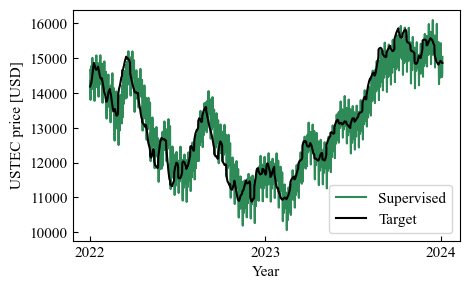

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import torch

pred_super = np.load('result\\2024-01-26-03-13_教師あり\\valid\\pred_40.npy') * 20000
target_super = np.load('result\\2024-01-26-03-13_教師あり\\valid\\target_40.npy') * 20000
# 可視化（SMA、EMA、ボリンジャーバンド）
plt.rcParams["font.size"] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.figure(figsize=(5,3))

# plt.fill_between(np.arange(len(pred_proposed[:, 0])), pred_proposed[:, 1], pred_proposed[:, 2], color='seagreen', alpha=0.2)

# plt.fill_between(np.arange(len(target_proposed[:, 0])), target_proposed[:, 1], target_proposed[:, 2], color='black', alpha=0.2)
plt.plot(pred_super[:, 0], label='pred', color='seagreen')
plt.plot(target_super[:, 0], label='target', color='black')

plt.xlabel("Year")
plt.ylabel("USTEC price [USD]")
# x軸に2022, 2023, 2024をそれぞれデータの左端，中央，右端に表示
plt.xticks([0, 1750/2, 1750], ['2022', '2023', '2024'])
#plt.ylim(-100000, 150000)
plt.legend(['Supervised', 'Target'], loc='lower right')

plt.savefig('fig/Supervised_sma.svg', dpi=1000, bbox_inches='tight', format='svg')

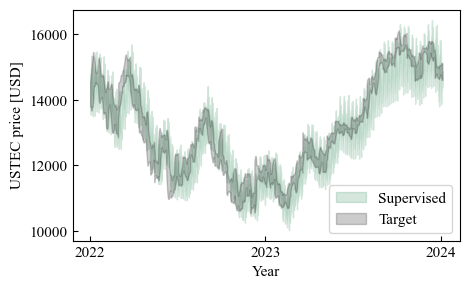

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import torch

pred_super = np.load('result\\2024-01-26-03-13_教師あり\\valid\\pred_40.npy') * 20000
target_super = np.load('result\\2024-01-26-03-13_教師あり\\valid\\target_40.npy') * 20000
# 可視化（SMA、EMA、ボリンジャーバンド）
plt.rcParams["font.size"] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.figure(figsize=(5,3))

plt.fill_between(np.arange(len(pred_super[:, 0])), pred_super[:, 1], pred_super[:, 2], color='seagreen', alpha=0.2)
plt.fill_between(np.arange(len(target_super[:, 0])), target_super[:, 1], target_super[:, 2], color='black', alpha=0.2)


plt.xlabel("Year")
plt.ylabel("USTEC price [USD]")
# x軸に2022, 2023, 2024をそれぞれデータの左端，中央，右端に表示
plt.xticks([0, 1750/2, 1750], ['2022', '2023', '2024'])
#plt.ylim(-100000, 150000)
plt.legend(['Supervised', 'Target'], loc='lower right')
plt.savefig('fig/Supervised_bb.svg', dpi=1000, bbox_inches='tight', format='svg')

In [48]:
# SMAのRMSE, MAEの計算
print("==SMA==")
rmse_sma_super = np.sqrt(np.mean((pred_super[:, 0] - target_super[:, 0])**2))
mae_sma_super = np.mean(np.abs(pred_super[:, 0] - target_super[:, 0]))
print('RMSE:', rmse_sma_super, 'MAE:', mae_sma_super)

rmse_sma_proposed = np.sqrt(np.mean((pred_proposed[:, 0] - target_proposed[:, 0])**2))
mae_sma_proposed = np.mean(np.abs(pred_proposed[:, 0] - target_proposed[:, 0]))
print('RMSE:', rmse_sma_proposed, 'MAE:', mae_sma_proposed)

# UpperBBのRMSE, MAEの計算
print("==UpperBB==")
rmse_upperbb_super = np.sqrt(np.mean((pred_super[:, 1] - target_super[:, 1])**2))
mae_upperbb_super = np.mean(np.abs(pred_super[:, 1] - target_super[:, 1]))
print('RMSE:', rmse_upperbb_super, 'MAE:', mae_upperbb_super)

rmse_upperbb_proposed = np.sqrt(np.mean((pred_proposed[:, 1] - target_proposed[:, 1])**2))
mae_upperbb_proposed = np.mean(np.abs(pred_proposed[:, 1] - target_proposed[:, 1]))
print('RMSE:', rmse_upperbb_proposed, 'MAE:', mae_upperbb_proposed)

# LowerBBのRMSE, MAEの計算
print("==LowerBB==")
rmse_lowerbb_super = np.sqrt(np.mean((pred_super[:, 2] - target_super[:, 2])**2))
mae_lowerbb_super = np.mean(np.abs(pred_super[:, 2] - target_super[:, 2]))
print('RMSE:', rmse_lowerbb_super, 'MAE:', mae_lowerbb_super)

rmse_lowerbb_proposed = np.sqrt(np.mean((pred_proposed[:, 2] - target_proposed[:, 2])**2))
mae_lowerbb_proposed = np.mean(np.abs(pred_proposed[:, 2] - target_proposed[:, 2]))
print('RMSE:', rmse_lowerbb_proposed, 'MAE:', mae_lowerbb_proposed)




==SMA==
RMSE: 489.97662 MAE: 393.67834
RMSE: 60151.508 MAE: 48314.227
==UpperBB==
RMSE: 533.2788 MAE: 428.93472
RMSE: 60374.125 MAE: 50317.0
==LowerBB==
RMSE: 567.81714 MAE: 462.95993
RMSE: 43962.336 MAE: 38499.934
